In [1]:
# Loading up the libraries
import numpy as np
import pandas as pd
import sklearn as scikit_learn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv
df = pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
columns_of_interest = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder',
    'Target'
]
extracted_data_correct = df[columns_of_interest]

# Display the new data frame
extracted_data_correct.head()

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,Target
0,13,10,6,10,0,0,1,0,Dropout
1,1,3,4,4,0,0,0,0,Graduate
2,22,27,10,10,0,0,0,0,Dropout
3,23,27,6,4,0,0,1,0,Graduate
4,22,28,10,10,0,0,1,0,Graduate


In [5]:
# Check for missing values in each column
missing_values = extracted_data_correct.isnull().sum()

# Print the results
for column, count in missing_values.items():
    print(f'{column}: {count} missing values')

Mother's qualification: 0 missing values
Father's qualification: 0 missing values
Mother's occupation: 0 missing values
Father's occupation: 0 missing values
Educational special needs: 0 missing values
Debtor: 0 missing values
Tuition fees up to date: 0 missing values
Scholarship holder: 0 missing values
Target: 0 missing values


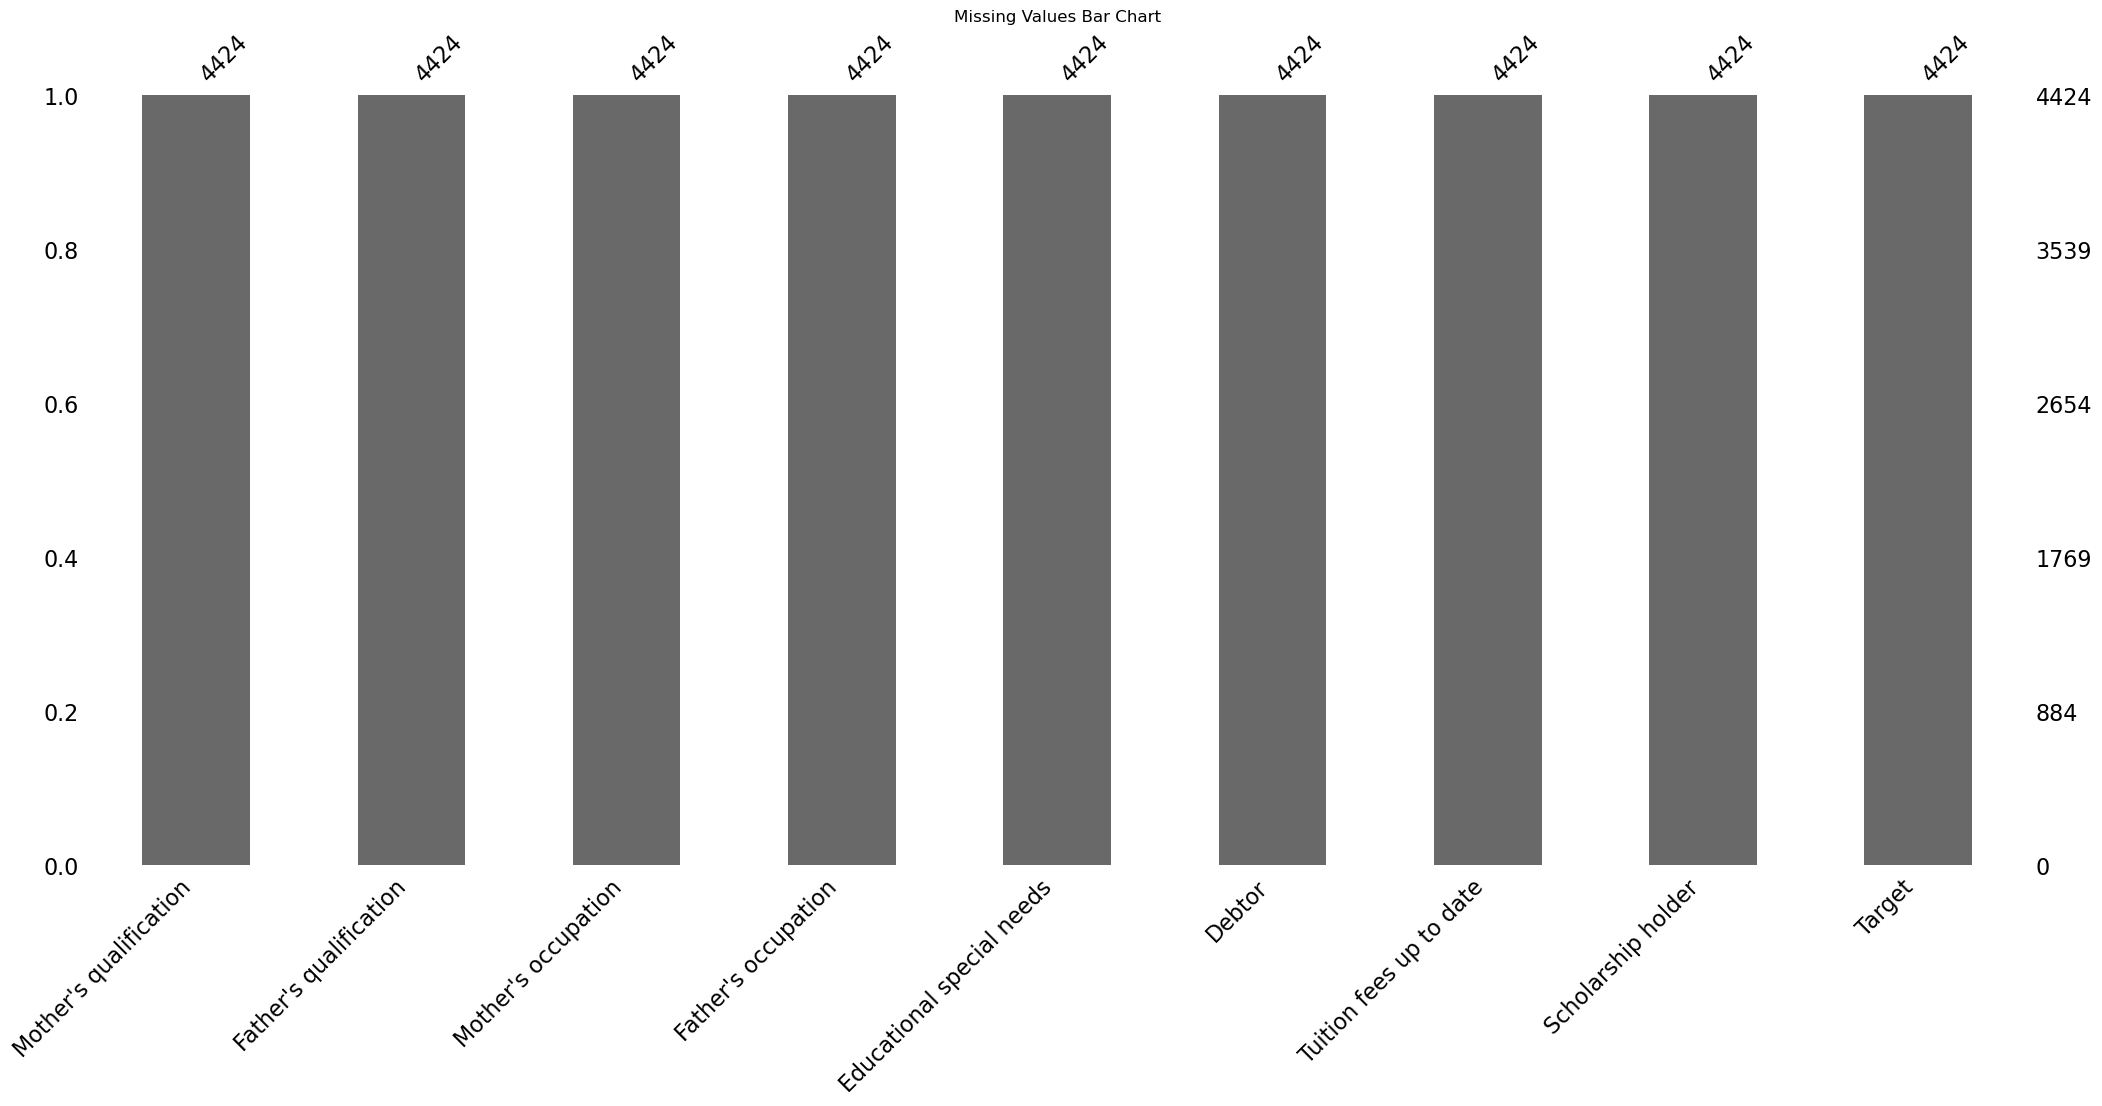

In [6]:
import missingno as msno

# Visualize missing values using a bar chart
plt.figure(figsize=(10, 6))
msno.bar(extracted_data_correct)
plt.title('Missing Values Bar Chart')
plt.show()

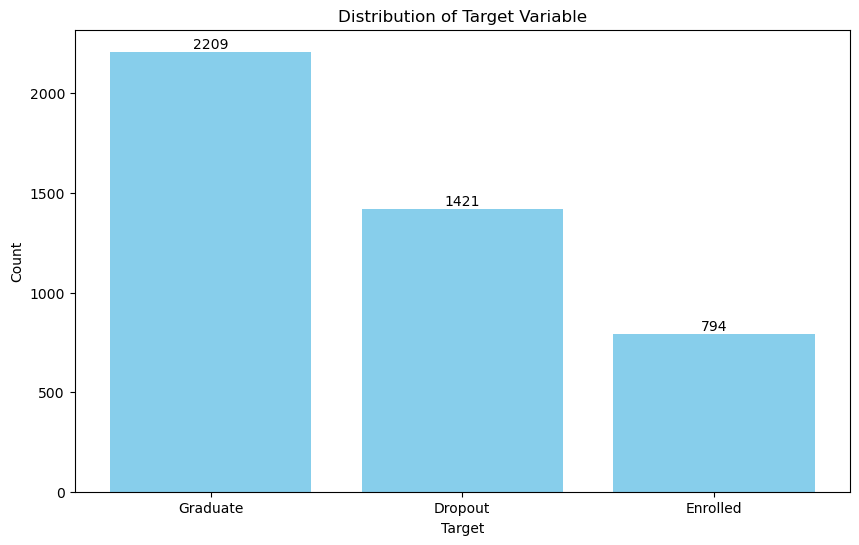

In [7]:
target_distribution = extracted_data_correct['Target'].value_counts()

# Create a bar chart for the target distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(target_distribution.index, target_distribution.values, color='skyblue')

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

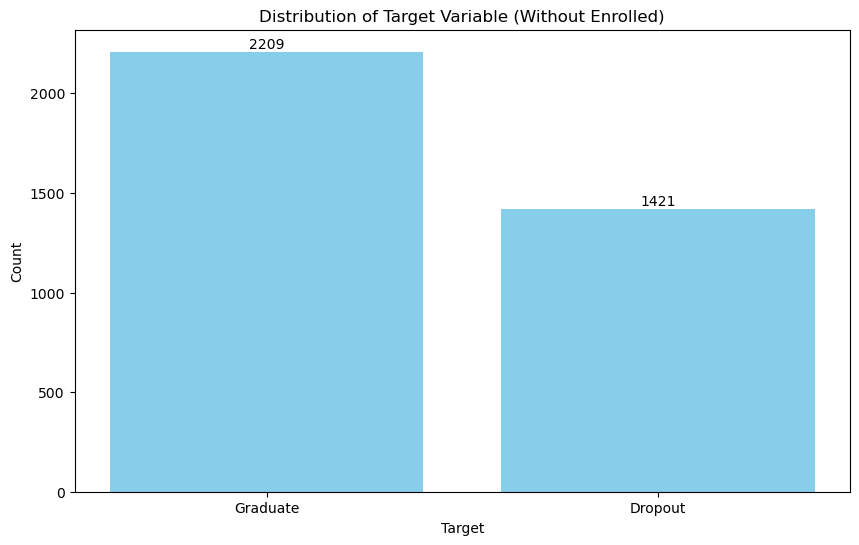

In [8]:
# Filter out 'Enrolled' from the target distribution
filtered_target_distribution = target_distribution.drop(labels='Enrolled')

# Create a bar chart for the filtered target distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_target_distribution.index, filtered_target_distribution.values, color='skyblue')

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Without Enrolled)')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
selected_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]

new_dataframe = data[selected_columns]

# Remove rows where 'Target' column has the value 'Enrolled'
cleaned_dataframe = new_dataframe[new_dataframe['Target'] != 'Enrolled']

# Prepare the data
# Separate features and target variable
X = cleaned_dataframe.drop('Target', axis=1)
y = cleaned_dataframe['Target']

# Encode categorical variables as single values
categorical_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]
binary_columns = [
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder"
]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Combine the processed categorical columns with binary columns
X_combined_single_value = X[categorical_columns + binary_columns]

# Split the dataset into training and test sets
X_train_single_value, X_test_single_value, y_train, y_test = train_test_split(
    X_combined_single_value, y, test_size=0.3, random_state=42)

# Implement logistic regression
logistic_model_single_value = LogisticRegression(max_iter=1000)
logistic_model_single_value.fit(X_train_single_value, y_train)

# Evaluate the model
y_pred_single_value = logistic_model_single_value.predict(X_test_single_value)
classification_rep_single_value = classification_report(y_test, y_pred_single_value)
conf_matrix_single_value = confusion_matrix(y_test, y_pred_single_value)

# Analyze feature importance
coefficients_single_value = logistic_model_single_value.coef_[0]
feature_names_single_value = categorical_columns + binary_columns

importance_df_single_value = pd.DataFrame({
    'Feature': feature_names_single_value,
    'Coefficient': coefficients_single_value
}).sort_values(by='Coefficient', ascending=False)

# Display results
print("Classification Report:\n", classification_rep_single_value)
print("Confusion Matrix:\n", conf_matrix_single_value)
print("Feature Importance:\n", importance_df_single_value)

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.90      0.37      0.52       414
    Graduate       0.72      0.98      0.83       675

    accuracy                           0.74      1089
   macro avg       0.81      0.67      0.67      1089
weighted avg       0.79      0.74      0.71      1089

Confusion Matrix:
 [[152 262]
 [ 16 659]]
Feature Importance:
                      Feature  Coefficient
6    Tuition fees up to date     2.996665
7         Scholarship holder     1.573707
2        Mother's occupation     0.049680
3        Father's occupation     0.011932
1     Father's qualification    -0.001249
0     Mother's qualification    -0.016385
4  Educational special needs    -0.316213
5                     Debtor    -0.898576


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
data = pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
selected_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]

new_dataframe = data[selected_columns]

# Remove rows where 'Target' column has the value 'Enrolled'
cleaned_dataframe = new_dataframe[new_dataframe['Target'] != 'Enrolled']

# Prepare the data
# Separate features and target variable
X = cleaned_dataframe.drop('Target', axis=1)
y = cleaned_dataframe['Target']

# Encode categorical variables as single values
categorical_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]
binary_columns = [
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder"
]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Combine the processed categorical columns with binary columns
X_combined_single_value = X[categorical_columns + binary_columns]

# Split the dataset into training and test sets
X_train_single_value, X_test_single_value, y_train, y_test = train_test_split(
    X_combined_single_value, y, test_size=0.3, random_state=42)

# Apply random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_single_value, y_train)

# Define the model and hyperparameters
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with 'l1' and 'l2'
}

# Implement k-fold cross-validation and hyperparameter tuning
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_single_value)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Analyze feature importance
coefficients = best_model.coef_[0]
feature_names = categorical_columns + binary_columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", importance_df)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.59      0.61      0.60       414
    Graduate       0.76      0.74      0.75       675

    accuracy                           0.69      1089
   macro avg       0.68      0.68      0.68      1089
weighted avg       0.70      0.69      0.69      1089

Confusion Matrix:
 [[254 160]
 [174 501]]
Feature Importance:
                      Feature  Coefficient
7         Scholarship holder     0.831621
6    Tuition fees up to date     0.784172
2        Mother's occupation     0.019356
3        Father's occupation    -0.003111
1     Father's qualification    -0.003498
0     Mother's qualification    -0.019388
4  Educational special needs    -0.030237
5                     Debtor    -0.571025


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
selected_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]

new_dataframe = data[selected_columns]

# Remove rows where 'Target' column has the value 'Enrolled'
cleaned_dataframe = new_dataframe[new_dataframe['Target'] != 'Enrolled']

# Prepare the data
# Separate features and target variable
X = cleaned_dataframe.drop('Target', axis=1)
y = cleaned_dataframe['Target']

# Encode categorical variables as single values
categorical_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]
binary_columns = [
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder"
]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Combine the processed categorical columns with binary columns
X_combined_single_value = X[categorical_columns + binary_columns]

# Split the dataset into training and test sets
X_train_single_value, X_test_single_value, y_train, y_test = train_test_split(
    X_combined_single_value, y, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_single_value, y_train)

# Define the model and hyperparameters
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with 'l1' and 'l2'
}

# Implement k-fold cross-validation and hyperparameter tuning
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_single_value)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Analyze feature importance
coefficients = best_model.coef_[0]
feature_names = categorical_columns + binary_columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", importance_df)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.62      0.54      0.58       414
    Graduate       0.74      0.80      0.77       675

    accuracy                           0.70      1089
   macro avg       0.68      0.67      0.67      1089
weighted avg       0.70      0.70      0.70      1089

Confusion Matrix:
 [[225 189]
 [136 539]]
Feature Importance:
                      Feature  Coefficient
6    Tuition fees up to date     3.333464
7         Scholarship holder     1.954505
2        Mother's occupation     0.052035
3        Father's occupation     0.013202
1     Father's qualification    -0.001002
0     Mother's qualification    -0.015803
4  Educational special needs    -0.024917
5                     Debtor    -0.650147


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
# Load the dataset
data = pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
selected_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]

new_dataframe = data[selected_columns]

# Remove rows where 'Target' column has the value 'Enrolled'
cleaned_dataframe = new_dataframe[new_dataframe['Target'] != 'Enrolled']

# Prepare the data
# Separate features and target variable
X = cleaned_dataframe.drop('Target', axis=1)
y = cleaned_dataframe['Target']

# Encode categorical variables as single values
categorical_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]
binary_columns = [
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder"
]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Combine the processed categorical columns with binary columns
X_combined_single_value = X[categorical_columns + binary_columns]

# Split the dataset into training and test sets
X_train_single_value, X_test_single_value, y_train, y_test = train_test_split(
    X_combined_single_value, y, test_size=0.3, random_state=42)

# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_single_value, y_train)

# Define the model and hyperparameters
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with 'l1' and 'l2'
}

# Implement k-fold cross-validation and hyperparameter tuning
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_single_value)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Analyze feature importance
coefficients = best_model.coef_[0]
feature_names = categorical_columns + binary_columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", importance_df)


Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.60      0.56      0.58       414
    Graduate       0.74      0.77      0.76       675

    accuracy                           0.69      1089
   macro avg       0.67      0.66      0.67      1089
weighted avg       0.69      0.69      0.69      1089

Confusion Matrix:
 [[231 183]
 [154 521]]
Feature Importance:
                      Feature  Coefficient
6    Tuition fees up to date     3.122067
7         Scholarship holder     1.580978
2        Mother's occupation     0.053869
3        Father's occupation     0.017424
1     Father's qualification     0.002228
0     Mother's qualification    -0.021156
4  Educational special needs    -0.534631
5                     Debtor    -0.757831


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss

# Load the dataset
data = pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
selected_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]

new_dataframe = data[selected_columns]

# Remove rows where 'Target' column has the value 'Enrolled'
cleaned_dataframe = new_dataframe[new_dataframe['Target'] != 'Enrolled']

# Prepare the data
# Separate features and target variable
X = cleaned_dataframe.drop('Target', axis=1)
y = cleaned_dataframe['Target']

# Encode categorical variables as single values
categorical_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]
binary_columns = [
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder"
]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Combine the processed categorical columns with binary columns
X_combined_single_value = X[categorical_columns + binary_columns]

# Split the dataset into training and test sets
X_train_single_value, X_test_single_value, y_train, y_test = train_test_split(
    X_combined_single_value, y, test_size=0.3, random_state=42)

# Apply NearMiss-1 undersampling
nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(X_train_single_value, y_train)

# Define the model and hyperparameters
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with 'l1' and 'l2'
}

# Implement k-fold cross-validation and hyperparameter tuning
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_single_value)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Analyze feature importance
coefficients = best_model.coef_[0]
feature_names = categorical_columns + binary_columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", importance_df)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.67      0.51      0.58       414
    Graduate       0.74      0.84      0.79       675

    accuracy                           0.72      1089
   macro avg       0.70      0.68      0.68      1089
weighted avg       0.71      0.72      0.71      1089

Confusion Matrix:
 [[210 204]
 [105 570]]
Feature Importance:
                      Feature  Coefficient
6    Tuition fees up to date     2.643496
7         Scholarship holder     1.412744
2        Mother's occupation     0.086473
1     Father's qualification     0.009807
0     Mother's qualification    -0.026390
3        Father's occupation    -0.035667
4  Educational special needs    -0.902382
5                     Debtor    -1.427098


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Load the dataset
data = pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
selected_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]

new_dataframe = data[selected_columns]

# Remove rows where 'Target' column has the value 'Enrolled'
cleaned_dataframe = new_dataframe[new_dataframe['Target'] != 'Enrolled']

# Prepare the data
# Separate features and target variable
X = cleaned_dataframe.drop('Target', axis=1)
y = cleaned_dataframe['Target']

# Encode categorical variables as single values
categorical_columns = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]
binary_columns = [
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder"
]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Combine the processed categorical columns with binary columns
X_combined_single_value = X[categorical_columns + binary_columns]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_single_value, y, test_size=0.3, random_state=42)

# Define the model and hyperparameters
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with 'l1' and 'l2'
}

# Function to perform grid search and evaluate the model
def evaluate_model(X_train, y_train, X_test, y_test):
    cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return grid_search.best_params_, classification_rep, conf_matrix, best_model

# 1. Original Model
original_best_params, original_classification_rep, original_conf_matrix, original_model = evaluate_model(X_train, y_train, X_test, y_test)

# 2. Random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train_single_value, y_train)
ros_best_params, ros_classification_rep, ros_conf_matrix, ros_model = evaluate_model(X_resampled_ros, y_resampled_ros, X_test, y_test)

# 3. SMOTE Oversampling
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
smote_best_params, smote_classification_rep, smote_conf_matrix, smote_model = evaluate_model(X_resampled_smote, y_resampled_smote, X_test, y_test)

# 4. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
rus_best_params, rus_classification_rep, rus_conf_matrix, rus_model = evaluate_model(X_resampled_rus, y_resampled_rus, X_test, y_test)

# 5. NearMiss-1 Undersampling
nm = NearMiss(version=1)
X_resampled_nm, y_resampled_nm = nm.fit_resample(X_train, y_train)
nm_best_params, nm_classification_rep, nm_conf_matrix, nm_model = evaluate_model(X_resampled_nm, y_resampled_nm, X_test, y_test)

# Compile the results
results = {
    "Model": ["Original", "Random Oversampling", "SMOTE", "Random Undersampling", "NearMiss-1"],
    "Best Parameters": [original_best_params, ros_best_params, smote_best_params, rus_best_params, nm_best_params],
    "Accuracy": [
        original_classification_rep['accuracy'],
        ros_classification_rep['accuracy'],
        smote_classification_rep['accuracy'],
        rus_classification_rep['accuracy'],
        nm_classification_rep['accuracy']
    ],
    "Precision (Dropout)": [
        original_classification_rep['Dropout']['precision'],
        ros_classification_rep['Dropout']['precision'],
        smote_classification_rep['Dropout']['precision'],
        rus_classification_rep['Dropout']['precision'],
        nm_classification_rep['Dropout']['precision']
    ],
    "Recall (Dropout)": [
        original_classification_rep['Dropout']['recall'],
        ros_classification_rep['Dropout']['recall'],
        smote_classification_rep['Dropout']['recall'],
        rus_classification_rep['Dropout']['recall'],
        nm_classification_rep['Dropout']['recall']
    ],
    "F1-Score (Dropout)": [
        original_classification_rep['Dropout']['f1-score'],
        ros_classification_rep['Dropout']['f1-score'],
        smote_classification_rep['Dropout']['f1-score'],
        rus_classification_rep['Dropout']['f1-score'],
        nm_classification_rep['Dropout']['f1-score']
    ],
    "Precision (Graduate)": [
        original_classification_rep['Graduate']['precision'],
        ros_classification_rep['Graduate']['precision'],
        smote_classification_rep['Graduate']['precision'],
        rus_classification_rep['Graduate']['precision'],
        nm_classification_rep['Graduate']['precision']
    ],
    "Recall (Graduate)": [
        original_classification_rep['Graduate']['recall'],
        ros_classification_rep['Graduate']['recall'],
        smote_classification_rep['Graduate']['recall'],
        rus_classification_rep['Graduate']['recall'],
        nm_classification_rep['Graduate']['recall']
    ],
    "F1-Score (Graduate)": [
        original_classification_rep['Graduate']['f1-score'],
        ros_classification_rep['Graduate']['f1-score'],
        smote_classification_rep['Graduate']['f1-score'],
        rus_classification_rep['Graduate']['f1-score'],
        nm_classification_rep['Graduate']['f1-score']
    ]
}

results_df = pd.DataFrame(results)

results_df


,Model,Best Parameters,Accuracy,Precision (Dropout),Recall (Dropout),F1-Score (Dropout),Precision (Graduate),Recall (Graduate),F1-Score (Graduate)
0,Original,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.744720,0.904762,0.367150,0.522337,0.715527,0.976296,0.825815
1,Random Oversampling,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.693297,0.593458,0.613527,0.603325,0.757943,0.742222,0.750000
2,SMOTE,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.701561,0.623269,0.543478,0.580645,0.740385,0.798519,0.768354
3,Random Undersampling,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.690542,0.600000,0.557971,0.578223,0.740057,0.771852,0.755620
4,NearMiss-1,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.716253,0.666667,0.507246,0.576132,0.736434,0.844444,0.786749


Classification Report:
              precision    recall  f1-score     support
Dropout        0.668293  0.494585  0.568465  277.000000
Graduate       0.731286  0.848552  0.785567  449.000000
accuracy       0.713499  0.713499  0.713499    0.713499
macro avg      0.699789  0.671569  0.677016  726.000000
weighted avg   0.707251  0.713499  0.702733  726.000000

Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.213260
3        Father's occupation    0.210556
2        Mother's occupation    0.164869
1     Father's qualification    0.123431
0     Mother's qualification    0.122773
7         Scholarship holder    0.100061
5                     Debtor    0.058672
4  Educational special needs    0.006377


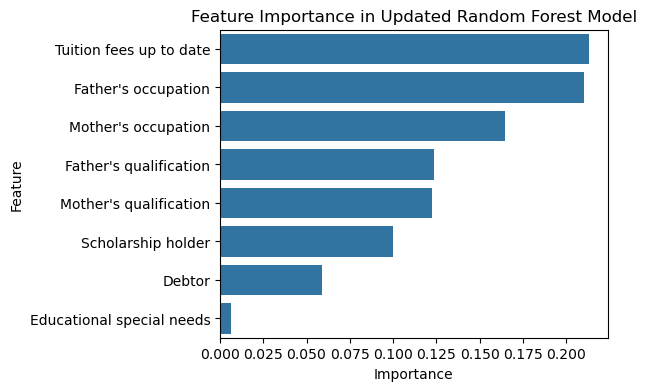

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = df[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_cols = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_cols = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Label encode the categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Combine all columns together
X_final = pd.concat([X[categorical_cols], X[binary_cols]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Implement Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the classification report
print("Classification Report:")
print(report_df)

# Display feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Updated Random Forest Model')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Classification Report:
              precision    recall  f1-score     support
Dropout        0.575862  0.602888  0.589065  277.000000
Graduate       0.747706  0.726058  0.736723  449.000000
accuracy       0.679063  0.679063  0.679063    0.679063
macro avg      0.661784  0.664473  0.662894  726.000000
weighted avg   0.682140  0.679063  0.680385  726.000000

Cross-Validation Scores:
[0.69421488 0.72451791 0.6969697  0.70798898 0.72727273]
Mean Cross-Validation Score: 0.7101928374655648

Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.215454
3        Father's occupation    0.195665
2        Mother's occupation    0.165860
7         Scholarship holder    0.138019
1     Father's qualification    0.110842
0     Mother's qualification    0.106892
5                     Debtor    0.059670
4  Educational special needs    0.007598


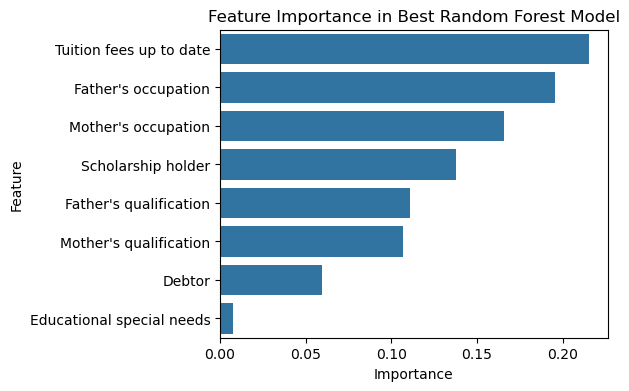

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = df[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_cols = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_cols = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Label encode the categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Combine all columns together
X_final = pd.concat([X[categorical_cols], X[binary_cols]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Implement Random Forest with GridSearchCV for hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# Best parameters from grid search
best_params = grid_search.best_params_

# Implement Random Forest with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_resampled, y_resampled)

# Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_final, y, cv=5)

# Feature importance
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the classification report
print("Classification Report:")
print(pd.DataFrame(report).transpose())

# Display cross-validation scores
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Display feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Best Random Forest Model')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Classification Report:
              precision    recall  f1-score     support
Dropout        0.574324  0.613718  0.593368  277.000000
Graduate       0.751163  0.719376  0.734926  449.000000
accuracy       0.679063  0.679063  0.679063    0.679063
macro avg      0.662744  0.666547  0.664147  726.000000
weighted avg   0.683691  0.679063  0.680916  726.000000

Cross-Validation Scores:
[0.70247934 0.75068871 0.71900826 0.73415978 0.72451791]
Mean Cross-Validation Score: 0.7261707988980717

Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.287397
7         Scholarship holder    0.195486
3        Father's occupation    0.146783
2        Mother's occupation    0.133639
0     Mother's qualification    0.092017
1     Father's qualification    0.091985
5                     Debtor    0.045959
4  Educational special needs    0.006735


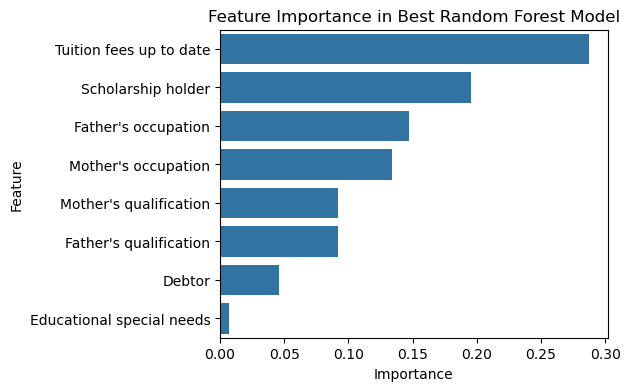

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = df[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_cols = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_cols = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Label encode the categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Combine all columns together
X_final = pd.concat([X[categorical_cols], X[binary_cols]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Implement Random Forest with GridSearchCV for hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# Best parameters from grid search
best_params = grid_search.best_params_

# Implement Random Forest with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_resampled, y_resampled)

# Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_final, y, cv=5)

# Feature importance
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the classification report
print("Classification Report:")
print(pd.DataFrame(report).transpose())

# Display cross-validation scores
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Display feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Best Random Forest Model')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Classification Report:
              precision    recall  f1-score    support
Dropout        0.672414  0.563177  0.612967  277.00000
Graduate       0.755061  0.830735  0.791092  449.00000
accuracy       0.728650  0.728650  0.728650    0.72865
macro avg      0.713737  0.696956  0.702029  726.00000
weighted avg   0.723527  0.728650  0.723130  726.00000

Cross-Validation Scores:
[0.74242424 0.76721763 0.73415978 0.74242424 0.74655647]
Mean Cross-Validation Score: 0.7465564738292012

Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.391637
7         Scholarship holder    0.277994
5                     Debtor    0.104471
2        Mother's occupation    0.086393
3        Father's occupation    0.063180
0     Mother's qualification    0.040556
1     Father's qualification    0.033810
4  Educational special needs    0.001959


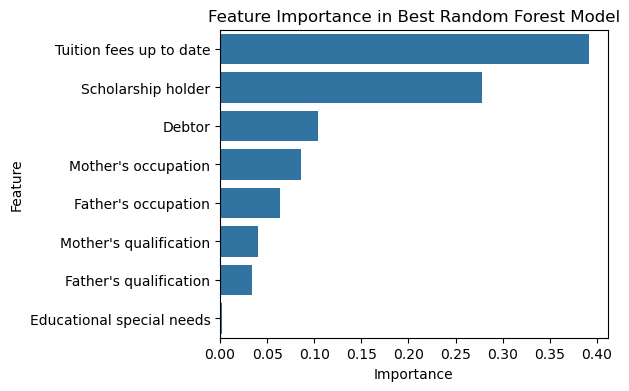

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = df[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_cols = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_cols = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Label encode the categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Combine all columns together
X_final = pd.concat([X[categorical_cols], X[binary_cols]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Implement Random Forest with GridSearchCV for hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# Best parameters from grid search
best_params = grid_search.best_params_

# Implement Random Forest with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_resampled, y_resampled)

# Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_final, y, cv=5)

# Feature importance
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the classification report
print("Classification Report:")
print(pd.DataFrame(report).transpose())

# Display cross-validation scores
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Display feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Best Random Forest Model')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Classification Report:
              precision    recall  f1-score     support
Dropout        0.685567  0.480144  0.564756  277.000000
Graduate       0.729323  0.864143  0.791030  449.000000
accuracy       0.717631  0.717631  0.717631    0.717631
macro avg      0.707445  0.672143  0.677893  726.000000
weighted avg   0.712628  0.717631  0.704696  726.000000

Cross-Validation Scores:
[0.74242424 0.76721763 0.73415978 0.74242424 0.74655647]
Mean Cross-Validation Score: 0.7465564738292012

Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.391654
7         Scholarship holder    0.190709
5                     Debtor    0.168528
2        Mother's occupation    0.099804
3        Father's occupation    0.066321
0     Mother's qualification    0.043823
1     Father's qualification    0.033828
4  Educational special needs    0.005333


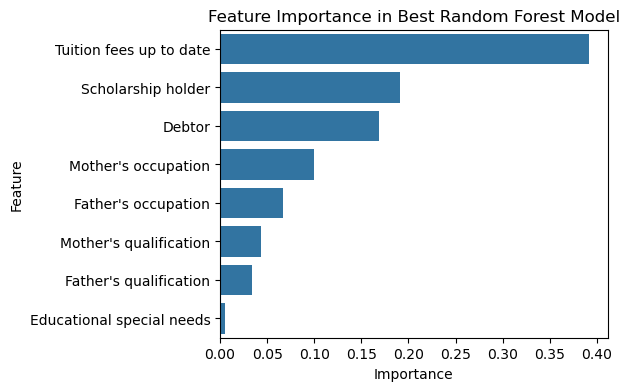

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = df[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_cols = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_cols = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Label encode the categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Combine all columns together
X_final = pd.concat([X[categorical_cols], X[binary_cols]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Apply NearMiss-1 Undersampling
nearmiss = NearMiss(version=1)
X_resampled, y_resampled = nearmiss.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Implement Random Forest with GridSearchCV for hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# Best parameters from grid search
best_params = grid_search.best_params_

# Implement Random Forest with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_resampled, y_resampled)

# Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_final, y, cv=5)

# Feature importance
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the classification report
print("Classification Report:")
print(pd.DataFrame(report).transpose())

# Display cross-validation scores
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Display feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Best Random Forest Model')
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the dataset
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = data[columns_to_extract]

# Remove rows where 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_columns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_columns = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Initialize label encoders for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to categorical columns
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded[col] = label_encoders[col].fit_transform(X[col])

# Combine binary and encoded categorical features
X_processed_encoded = X_encoded.values

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_processed_encoded, y, test_size=0.3, random_state=42)

# Initialize and train the SVM model
svm_model_encoded = SVC(kernel='linear', random_state=42)
svm_model_encoded.fit(X_train_encoded, y_train_encoded)

# Predict on the test set
y_pred_encoded = svm_model_encoded.predict(X_test_encoded)

# Evaluate the model
report_encoded = classification_report(y_test_encoded, y_pred_encoded)
conf_matrix_encoded = confusion_matrix(y_test_encoded, y_pred_encoded)

print("Classification Report:\n", report_encoded)
print("Confusion Matrix:\n", conf_matrix_encoded)

# Get the coefficients of the SVM model
coefficients_encoded = svm_model_encoded.coef_.flatten()

# Combine the feature names from binary and encoded categorical features
feature_names_encoded = binary_columns + categorical_columns

# Create a DataFrame to display the feature importance
feature_importance_encoded = pd.DataFrame({
    'Feature': feature_names_encoded,
    'Coefficient': coefficients_encoded
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", feature_importance_encoded)

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.95      0.29      0.44       414
    Graduate       0.69      0.99      0.82       675

    accuracy                           0.72      1089
   macro avg       0.82      0.64      0.63      1089
weighted avg       0.79      0.72      0.67      1089

Confusion Matrix:
 [[119 295]
 [  6 669]]
Feature Importance:
                      Feature  Coefficient
6        Mother's occupation     2.000005
7        Father's occupation     0.000097
4     Mother's qualification     0.000057
2    Tuition fees up to date     0.000027
3         Scholarship holder     0.000019
1                     Debtor     0.000007
0  Educational special needs    -0.000007
5     Father's qualification    -0.000579


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.inspection import permutation_importance

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = data[columns_to_extract]

# Remove rows where 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_columns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_columns = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Initialize label encoders for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to categorical columns
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded[col] = label_encoders[col].fit_transform(X[col])

# Combine binary and encoded categorical features
X_processed_encoded = X_encoded.values

# Apply Random Oversampling to balance the classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_processed_encoded, y)

# Define the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Apply GridSearchCV for hyperparameter tuning with fewer folds
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=stratified_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_svm_model = grid_search.best_estimator_

# Evaluate using k-fold cross-validation with fewer folds
cv_scores = cross_val_score(best_svm_model, X_resampled, y_resampled, cv=3, scoring='accuracy')

# Fit the best model on the training data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
best_svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute feature importance using permutation importance
perm_importance = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Combine the feature names from binary and encoded categorical features
feature_names = binary_columns + categorical_columns

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", feature_importance)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-Validation Scores: [0.66191446 0.69925322 0.68410326]
Mean CV Score: 0.6817569819553903
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.70      0.64      0.67       653
    Graduate       0.68      0.73      0.70       673

    accuracy                           0.69      1326
   macro avg       0.69      0.69      0.69      1326
weighted avg       0.69      0.69      0.69      1326

Confusion Matrix:
 [[420 233]
 [181 492]]
Feature Importance:
                      Feature  Importance
6        Mother's occupation    0.065083
7        Father's occupation    0.064178
0  Educational special needs    0.027753
5     Father's qualification    0.017722
2    Tuition fees up to date    0.007768
1                     Debtor    0.007617
3         Scholarship holder    0.006486
4     Mother's qualification    0.000905


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = data[columns_to_extract]

# Remove rows where 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_columns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_columns = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Initialize label encoders for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to categorical columns
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded[col] = label_encoders[col].fit_transform(X[col])

# Combine binary and encoded categorical features
X_processed_encoded = X_encoded.values

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed_encoded, y)

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Apply GridSearchCV for hyperparameter tuning with fewer folds
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=stratified_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_svm_model = grid_search.best_estimator_

# Evaluate using k-fold cross-validation with fewer folds
cv_scores = cross_val_score(best_svm_model, X_resampled, y_resampled, cv=3, scoring='accuracy')

# Fit the best model on the training data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
best_svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute feature importance using permutation importance
perm_importance = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Combine the feature names from binary and encoded categorical features
feature_names = binary_columns + categorical_columns

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", feature_importance)


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Cross-Validation Scores: [0.67684997 0.67684997 0.73709239]
Mean CV Score: 0.6969307744718951
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.69      0.71      0.70       653
    Graduate       0.71      0.69      0.70       673

    accuracy                           0.70      1326
   macro avg       0.70      0.70      0.70      1326
weighted avg       0.70      0.70      0.70      1326

Confusion Matrix:
 [[465 188]
 [206 467]]
Feature Importance:
                      Feature  Importance
6        Mother's occupation    0.073906
0  Educational special needs    0.062971
7        Father's occupation    0.058597
2    Tuition fees up to date    0.047738
1                     Debtor    0.045400
3         Scholarship holder    0.033409
5     Father's qualification    0.012066
4     Mother's qualification   -0.000830


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = data[columns_to_extract]

# Remove rows where 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_columns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_columns = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Initialize label encoders for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to categorical columns
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded[col] = label_encoders[col].fit_transform(X[col])

# Combine binary and encoded categorical features
X_processed_encoded = X_encoded.values

# Apply Random Undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_processed_encoded, y)

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Apply GridSearchCV for hyperparameter tuning with fewer folds
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=stratified_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_svm_model = grid_search.best_estimator_

# Evaluate using k-fold cross-validation with fewer folds
cv_scores = cross_val_score(best_svm_model, X_resampled, y_resampled, cv=3, scoring='accuracy')

# Fit the best model on the training data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
best_svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute feature importance using permutation importance
perm_importance = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Combine the feature names from binary and encoded categorical features
feature_names = binary_columns + categorical_columns

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", feature_importance)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-Validation Scores: [0.67299578 0.67898627 0.69482577]
Mean CV Score: 0.6822692728685001
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.71      0.64      0.67       427
    Graduate       0.67      0.74      0.70       426

    accuracy                           0.69       853
   macro avg       0.69      0.69      0.69       853
weighted avg       0.69      0.69      0.69       853

Confusion Matrix:
 [[273 154]
 [111 315]]
Feature Importance:
                      Feature  Importance
7        Father's occupation    0.076319
6        Mother's occupation    0.061430
5     Father's qualification    0.016061
2    Tuition fees up to date    0.008324
3         Scholarship holder    0.007972
0  Educational special needs    0.006213
4     Mother's qualification   -0.002345
1                     Debtor   -0.009144


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.inspection import permutation_importance
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_df = data[columns_to_extract]

# Remove rows where 'Target' column has the value 'Enrolled'
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled']

# Separate features and target
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Define categorical and binary columns
categorical_columns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
binary_columns = ["Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]

# Initialize label encoders for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to categorical columns
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded[col] = label_encoders[col].fit_transform(X[col])

# Combine binary and encoded categorical features
X_processed_encoded = X_encoded.values

# Apply NearMiss-1 undersampling to balance the classes
nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(X_processed_encoded, y)

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Apply GridSearchCV for hyperparameter tuning with fewer folds
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=stratified_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_svm_model = grid_search.best_estimator_

# Evaluate using k-fold cross-validation with fewer folds
cv_scores = cross_val_score(best_svm_model, X_resampled, y_resampled, cv=3, scoring='accuracy')

# Fit the best model on the training data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
best_svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute feature importance using permutation importance
perm_importance = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Combine the feature names from binary and encoded categorical features
feature_names = binary_columns + categorical_columns

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Feature Importance:\n", feature_importance)


Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Cross-Validation Scores: [0.53481013 0.67265048 0.63780359]
Mean CV Score: 0.6150880640173945
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.79      0.62      0.69       427
    Graduate       0.68      0.84      0.75       426

    accuracy                           0.73       853
   macro avg       0.74      0.73      0.72       853
weighted avg       0.74      0.73      0.72       853

Confusion Matrix:
 [[263 164]
 [ 70 356]]
Feature Importance:
                      Feature  Importance
0  Educational special needs    0.101290
6        Mother's occupation    0.083587
2    Tuition fees up to date    0.080774
1                     Debtor    0.072216
3         Scholarship holder    0.058030
5     Father's qualification    0.015006
7        Father's occupation    0.006331
4     Mother's qualification   -0.000117


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import numpy as np

# Load the dataset
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_data = data[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_data = extracted_data[extracted_data['Target'] != 'Enrolled'].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    filtered_data.loc[:, column] = label_encoder.fit_transform(filtered_data.loc[:, column])

# Split the data into features and target
X = filtered_data.drop(columns=["Target"])
y = label_encoder.fit_transform(filtered_data["Target"])  # Encoding the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate permutation importance
perm_importance = permutation_importance(knn, X_test, y_test, scoring='accuracy')

# Get feature importance
feature_importance = perm_importance.importances_mean
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance_df)


Accuracy: 0.6694214876033058
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.60      0.39      0.48       277
    Graduate       0.69      0.84      0.76       449

    accuracy                           0.67       726
   macro avg       0.65      0.62      0.62       726
weighted avg       0.66      0.67      0.65       726

Confusion Matrix:
[[109 168]
 [ 72 377]]
Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.042700
0     Mother's qualification    0.033609
3        Father's occupation    0.028926
7         Scholarship holder    0.023416
1     Father's qualification    0.023140
2        Mother's occupation    0.017080
5                     Debtor    0.011846
4  Educational special needs   -0.000275


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Load the dataset
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_data = data[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_data = extracted_data[extracted_data['Target'] != 'Enrolled'].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    filtered_data.loc[:, column] = label_encoder.fit_transform(filtered_data.loc[:, column])

# Split the data into features and target
X = filtered_data.drop(columns=["Target"])
y = label_encoder.fit_transform(filtered_data["Target"])  # Encoding the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Apply GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_resampled, y_train_resampled)
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate permutation importance
perm_importance = permutation_importance(best_knn, X_test, y_test, scoring='accuracy')

# Get feature importance
feature_importance = perm_importance.importances_mean
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance_df)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.6735537190082644
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.58      0.53      0.55       277
    Graduate       0.72      0.76      0.74       449

    accuracy                           0.67       726
   macro avg       0.65      0.65      0.65       726
weighted avg       0.67      0.67      0.67       726

Confusion Matrix:
[[147 130]
 [107 342]]
Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.047658
7         Scholarship holder    0.041873
2        Mother's occupation    0.040496
0     Mother's qualification    0.039669
3        Father's occupation    0.034711
1     Father's qualification    0.026997
5                     Debtor    0.018733
4  Educational special needs    0.000551


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

# Load the dataset
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_data = data[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_data = extracted_data[extracted_data['Target'] != 'Enrolled'].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    filtered_data.loc[:, column] = label_encoder.fit_transform(filtered_data.loc[:, column])

# Split the data into features and target
X = filtered_data.drop(columns=["Target"])
y = label_encoder.fit_transform(filtered_data["Target"])  # Encoding the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Apply GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_resampled, y_train_resampled)
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate permutation importance
perm_importance = permutation_importance(best_knn, X_test, y_test, scoring='accuracy')

# Get feature importance
feature_importance = perm_importance.importances_mean
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance_df)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.6776859504132231
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.59      0.53      0.56       277
    Graduate       0.73      0.77      0.75       449

    accuracy                           0.68       726
   macro avg       0.66      0.65      0.65       726
weighted avg       0.67      0.68      0.67       726

Confusion Matrix:
[[146 131]
 [103 346]]
Feature Importance:
                     Feature  Importance
6    Tuition fees up to date    0.063361
0     Mother's qualification    0.046832
3        Father's occupation    0.036364
7         Scholarship holder    0.035537
1     Father's qualification    0.034435
2        Mother's occupation    0.033333
5                     Debtor    0.018733
4  Educational special needs   -0.000551


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_data = data[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_data = extracted_data[extracted_data['Target'] != 'Enrolled'].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    filtered_data.loc[:, column] = label_encoder.fit_transform(filtered_data.loc[:, column])

# Split the data into features and target
X = filtered_data.drop(columns=["Target"])
y = label_encoder.fit_transform(filtered_data["Target"])  # Encoding the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Apply GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_resampled, y_train_resampled)
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate permutation importance
perm_importance = permutation_importance(best_knn, X_test, y_test, scoring='accuracy')

# Get feature importance
feature_importance = perm_importance.importances_mean
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance_df)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6129476584022039
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.49      0.71      0.58       277
    Graduate       0.75      0.55      0.64       449

    accuracy                           0.61       726
   macro avg       0.62      0.63      0.61       726
weighted avg       0.66      0.61      0.62       726

Confusion Matrix:
[[196  81]
 [200 249]]
Feature Importance:
                     Feature  Importance
7         Scholarship holder    0.050689
6    Tuition fees up to date    0.031956
5                     Debtor    0.011019
0     Mother's qualification    0.009091
1     Father's qualification    0.004683
2        Mother's occupation    0.003581
4  Educational special needs   -0.000275
3        Father's occupation   -0.013774


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import NearMiss

# Load the dataset
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "Target"
]
extracted_data = data[columns_to_extract]

# Remove rows where the 'Target' column has the value 'Enrolled'
filtered_data = extracted_data[extracted_data['Target'] != 'Enrolled'].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    filtered_data.loc[:, column] = label_encoder.fit_transform(filtered_data.loc[:, column])

# Split the data into features and target
X = filtered_data.drop(columns=["Target"])
y = label_encoder.fit_transform(filtered_data["Target"])  # Encoding the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply NearMiss-1 Undersampling
nm = NearMiss(version=1)
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Apply GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_resampled, y_train_resampled)
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate permutation importance
perm_importance = permutation_importance(best_knn, X_test, y_test, scoring='accuracy')

# Get feature importance
feature_importance = perm_importance.importances_mean
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance_df)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.5757575757575758
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.47      0.74      0.57       277
    Graduate       0.75      0.47      0.58       449

    accuracy                           0.58       726
   macro avg       0.61      0.61      0.58       726
weighted avg       0.64      0.58      0.58       726

Confusion Matrix:
[[206  71]
 [237 212]]
Feature Importance:
                     Feature  Importance
0     Mother's qualification    0.039394
1     Father's qualification    0.034435
7         Scholarship holder    0.033333
2        Mother's occupation    0.028650
3        Father's occupation    0.017355
6    Tuition fees up to date    0.016253
5                     Debtor    0.005785
4  Educational special needs    0.000000


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation", 
    "Educational special needs", 
    "Debtor", 
    "Tuition fees up to date", 
    "Scholarship holder", 
    "Target"
]

extracted_df = data.loc[:, columns_to_extract]

# Remove rows where the Target column has the value "Enrolled"
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled'].copy()

# Encode categorical columns
label_encoders = {}
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    label_encoders[column] = LabelEncoder()
    filtered_df.loc[:, column] = label_encoders[column].fit_transform(filtered_df.loc[:, column])

# Encode target variable
target_encoder = LabelEncoder()
filtered_df['Target'] = target_encoder.fit_transform(filtered_df['Target'])

# Ensure the target variable is binary
assert len(np.unique(filtered_df['Target'])) == 2, "Target variable should be binary."

# Separate features and target variable
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Perform stratified split to maintain the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ensure training and testing targets are binary and consistent
assert len(np.unique(y_train)) == 2, "Training target variable should be binary."
assert len(np.unique(y_test)) == 2, "Testing target variable should be binary."

# Train the XGBoost model with binary:logistic objective for binary classification
xgb_model = XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, objective='binary:logistic', eval_metric='logloss', early_stopping_rounds=10)

# Fit the model
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Evaluate the model
y_pred = xgb_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Decode the target labels for the classification report
y_test_decoded = target_encoder.inverse_transform(y_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)

report = classification_report(y_test_decoded, y_pred_decoded, target_names=target_encoder.classes_)

# Feature importance
importance = xgb_model.feature_importances_

# Map feature importances to their corresponding columns
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Prepare the report as a DataFrame
report_data = {
    "Metric": ["Accuracy"],
    "Value": [accuracy]
}
report_df = pd.DataFrame(report_data)

# Display the results
print("XGBoost Model Evaluation Report")
print(report_df)
print("\nClassification Report:\n", report)
print("\nFeature Importances:\n", feature_importances)


XGBoost Model Evaluation Report
     Metric     Value
0  Accuracy  0.758953

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.87      0.45      0.60       284
    Graduate       0.73      0.95      0.83       442

    accuracy                           0.76       726
   macro avg       0.80      0.70      0.71       726
weighted avg       0.78      0.76      0.74       726


Feature Importances:
                      Feature  Importance
6    Tuition fees up to date    0.690834
7         Scholarship holder    0.176411
5                     Debtor    0.046843
2        Mother's occupation    0.028959
0     Mother's qualification    0.015330
3        Father's occupation    0.015140
1     Father's qualification    0.013699
4  Educational special needs    0.012784


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation", 
    "Educational special needs", 
    "Debtor", 
    "Tuition fees up to date", 
    "Scholarship holder", 
    "Target"
]

extracted_df = data.loc[:, columns_to_extract]

# Remove rows where the Target column has the value "Enrolled"
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled'].copy()

# Encode categorical columns
label_encoders = {}
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    label_encoders[column] = LabelEncoder()
    filtered_df.loc[:, column] = label_encoders[column].fit_transform(filtered_df.loc[:, column])

# Encode target variable
target_encoder = LabelEncoder()
filtered_df['Target'] = target_encoder.fit_transform(filtered_df['Target'])

# Ensure the target variable is binary
assert len(np.unique(filtered_df['Target'])) == 2, "Target variable should be binary."

# Separate features and target variable
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Perform stratified split to maintain the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

# Set up StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning and cross-validation
grid_search.fit(X_train_res, y_train_res)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Decode the target labels for the classification report
y_test_decoded = target_encoder.inverse_transform(y_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)

report = classification_report(y_test_decoded, y_pred_decoded, target_names=target_encoder.classes_)

# Feature importance
importance = best_model.feature_importances_

# Map feature importances to their corresponding columns
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Prepare the report as a DataFrame
report_data = {
    "Metric": ["Accuracy"],
    "Value": [accuracy]
}
report_df = pd.DataFrame(report_data)

# Display the results
print("XGBoost Model Evaluation Report")
print(report_df)
print("\nClassification Report:\n", report)
print("\nFeature Importances:\n", feature_importances)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Model Evaluation Report
     Metric     Value
0  Accuracy  0.720386

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.66      0.60      0.62       284
    Graduate       0.75      0.80      0.78       442

    accuracy                           0.72       726
   macro avg       0.71      0.70      0.70       726
weighted avg       0.72      0.72      0.72       726


Feature Importances:
                      Feature  Importance
6    Tuition fees up to date    0.695597
7         Scholarship holder    0.165135
5                     Debtor    0.040571
2        Mother's occupation    0.023814
4  Educational special needs    0.023268
1     Father's qualification    0.018198
3        Father's occupation    0.017000
0     Mother's qualification    0.016417


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation", 
    "Educational special needs", 
    "Debtor", 
    "Tuition fees up to date", 
    "Scholarship holder", 
    "Target"
]

extracted_df = data.loc[:, columns_to_extract]

# Remove rows where the Target column has the value "Enrolled"
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled'].copy()

# Encode categorical columns
label_encoders = {}
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    label_encoders[column] = LabelEncoder()
    filtered_df.loc[:, column] = label_encoders[column].fit_transform(filtered_df.loc[:, column])

# Encode target variable
target_encoder = LabelEncoder()
filtered_df['Target'] = target_encoder.fit_transform(filtered_df['Target'])

# Ensure the target variable is binary
assert len(np.unique(filtered_df['Target'])) == 2, "Target variable should be binary."

# Separate features and target variable
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Perform stratified split to maintain the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

# Set up StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning and cross-validation
grid_search.fit(X_train_res, y_train_res)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Decode the target labels for the classification report
y_test_decoded = target_encoder.inverse_transform(y_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)

report = classification_report(y_test_decoded, y_pred_decoded, target_names=target_encoder.classes_)

# Feature importance
importance = best_model.feature_importances_

# Map feature importances to their corresponding columns
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Prepare the report as a DataFrame
report_data = {
    "Metric": ["Accuracy"],
    "Value": [accuracy]
}
report_df = pd.DataFrame(report_data)

# Display the results
print("XGBoost Model Evaluation Report")
print(report_df)
print("\nClassification Report:\n", report)
print("\nFeature Importances:\n", feature_importances)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Model Evaluation Report
     Metric     Value
0  Accuracy  0.706612

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.62      0.65      0.63       284
    Graduate       0.77      0.74      0.75       442

    accuracy                           0.71       726
   macro avg       0.69      0.70      0.69       726
weighted avg       0.71      0.71      0.71       726


Feature Importances:
                      Feature  Importance
6    Tuition fees up to date    0.693987
7         Scholarship holder    0.214449
5                     Debtor    0.020516
2        Mother's occupation    0.020312
0     Mother's qualification    0.016852
3        Father's occupation    0.014491
1     Father's qualification    0.013489
4  Educational special needs    0.005904


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation", 
    "Educational special needs", 
    "Debtor", 
    "Tuition fees up to date", 
    "Scholarship holder", 
    "Target"
]

extracted_df = data.loc[:, columns_to_extract]

# Remove rows where the Target column has the value "Enrolled"
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled'].copy()

# Encode categorical columns
label_encoders = {}
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    label_encoders[column] = LabelEncoder()
    filtered_df.loc[:, column] = label_encoders[column].fit_transform(filtered_df.loc[:, column])

# Encode target variable
target_encoder = LabelEncoder()
filtered_df['Target'] = target_encoder.fit_transform(filtered_df['Target'])

# Ensure the target variable is binary
assert len(np.unique(filtered_df['Target'])) == 2, "Target variable should be binary."

# Separate features and target variable
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Perform stratified split to maintain the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

# Set up StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning and cross-validation
grid_search.fit(X_train_res, y_train_res)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Decode the target labels for the classification report
y_test_decoded = target_encoder.inverse_transform(y_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)

report = classification_report(y_test_decoded, y_pred_decoded, target_names=target_encoder.classes_)

# Feature importance
importance = best_model.feature_importances_

# Map feature importances to their corresponding columns
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Prepare the report as a DataFrame
report_data = {
    "Metric": ["Accuracy"],
    "Value": [accuracy]
}
report_df = pd.DataFrame(report_data)

# Display the results
print("XGBoost Model Evaluation Report")
print(report_df)
print("\nClassification Report:\n", report)
print("\nFeature Importances:\n", feature_importances)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Model Evaluation Report
     Metric     Value
0  Accuracy  0.709366

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.64      0.58      0.61       284
    Graduate       0.75      0.79      0.77       442

    accuracy                           0.71       726
   macro avg       0.69      0.69      0.69       726
weighted avg       0.71      0.71      0.71       726


Feature Importances:
                      Feature  Importance
6    Tuition fees up to date    0.667188
7         Scholarship holder    0.176463
5                     Debtor    0.051415
2        Mother's occupation    0.028086
3        Father's occupation    0.025457
0     Mother's qualification    0.021638
1     Father's qualification    0.017940
4  Educational special needs    0.011813


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import NearMiss
import numpy as np

# Load the CSV file
data =  pd.read_csv(r"D:\CT7205\Assesement\dataset.csv")

# Extract the specified columns
columns_to_extract = [
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation", 
    "Educational special needs", 
    "Debtor", 
    "Tuition fees up to date", 
    "Scholarship holder", 
    "Target"
]

extracted_df = data.loc[:, columns_to_extract]

# Remove rows where the Target column has the value "Enrolled"
filtered_df = extracted_df[extracted_df['Target'] != 'Enrolled'].copy()

# Encode categorical columns
label_encoders = {}
for column in ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]:
    label_encoders[column] = LabelEncoder()
    filtered_df.loc[:, column] = label_encoders[column].fit_transform(filtered_df.loc[:, column])

# Encode target variable
target_encoder = LabelEncoder()
filtered_df['Target'] = target_encoder.fit_transform(filtered_df['Target'])

# Ensure the target variable is binary
assert len(np.unique(filtered_df['Target'])) == 2, "Target variable should be binary."

# Separate features and target variable
X = filtered_df.drop(columns=['Target'])
y = filtered_df['Target']

# Perform stratified split to maintain the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply NearMiss-1 undersampling
nm1 = NearMiss(version=1)
X_train_res, y_train_res = nm1.fit_resample(X_train, y_train)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

# Set up StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning and cross-validation
grid_search.fit(X_train_res, y_train_res)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Decode the target labels for the classification report
y_test_decoded = target_encoder.inverse_transform(y_test)
y_pred_decoded = target_encoder.inverse_transform(y_pred)

report = classification_report(y_test_decoded, y_pred_decoded, target_names=target_encoder.classes_)

# Feature importance
importance = best_model.feature_importances_

# Map feature importances to their corresponding columns
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Prepare the report as a DataFrame
report_data = {
    "Metric": ["Accuracy"],
    "Value": [accuracy]
}
report_df = pd.DataFrame(report_data)

# Display the results
print("XGBoost Model Evaluation Report")
print(report_df)
print("\nClassification Report:\n", report)
print("\nFeature Importances:\n", feature_importances)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Model Evaluation Report
     Metric     Value
0  Accuracy  0.713499

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.65      0.60      0.62       284
    Graduate       0.75      0.79      0.77       442

    accuracy                           0.71       726
   macro avg       0.70      0.69      0.69       726
weighted avg       0.71      0.71      0.71       726


Feature Importances:
                      Feature  Importance
6    Tuition fees up to date    0.609707
7         Scholarship holder    0.167548
5                     Debtor    0.107855
2        Mother's occupation    0.032152
0     Mother's qualification    0.027596
1     Father's qualification    0.021931
3        Father's occupation    0.020947
4  Educational special needs    0.012263
